In [1]:
import GPy
import pandas as pd
import numpy as np
import komatsu
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.size"] = 16

In [2]:
hasaki_names, hasaki = komatsu.load_data(komatsu.HASAKI_NAMES, komatsu.HASAKI)
mamouryo_names, mamouryo = komatsu.load_data(komatsu.MAMOURYO_NAMES, komatsu.MAMOURYO)
sessaku_names, sessaku = komatsu.load_data(komatsu.SESSAKU_NAMES, komatsu.SESSAKU)

In [3]:
Y = mamouryo[0]
X = hasaki.transpose(1, 0)

X, Y, _, _ = komatsu.normalize(X, Y)
print(Y.shape, X.shape)
n_features = X.shape[1]
print(n_features)
Y = Y[:, np.newaxis]
print(Y.shape, X.shape)

(50,) (50, 37)
37
(50, 1) (50, 37)


In [4]:
# kernel = GPy.kern.RBF(n_features, variance=10, ARD=True)
kernel = GPy.kern.Matern52(n_features, ARD=True)


In [5]:
model = GPy.models.GPRegression(X, Y, kernel)
model.optimize(messages=True, max_iters=1e5)

A Jupyter Widget

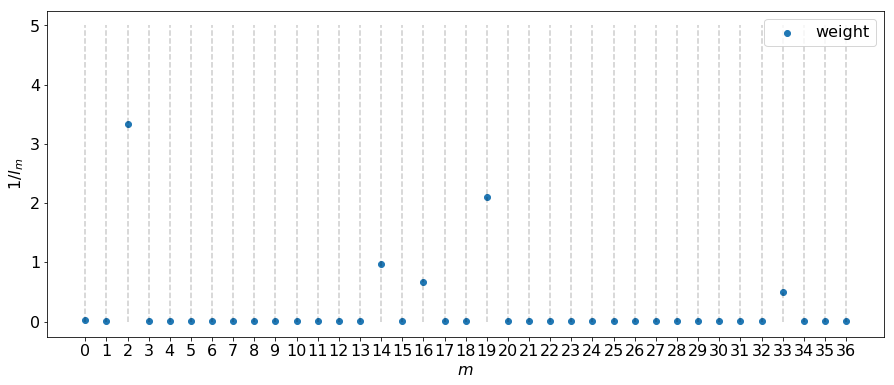

[57.78783349050295, 117.64875300022146, 0.3004454207910631, 698.6156848649981, 84.41440079963648, 429.1443471733801, 308.49109237178595, 151.38599188021647, 585.7295938860099, 212.6289673648309, 176.9296109267357, 379.55915795672854, 296.8740554669892, 561.9130896358853, 1.0236762301069733, 242.8807107324586, 1.485872466111308, 145.89078303736616, 59.42771247979513, 0.4771655888897171, 285.80329544094207, 198.91683245057712, 230.53272746393068, 444.055930687002, 178.71625041975233, 410.4908643727071, 223.91549735582973, 165.0049296439726, 159.07359806861064, 194.57204702065357, 79.216240352239, 96.10105288300001, 175.65269204523813, 1.9840413319384165, 267.8550766549335, 377.57924865864805, 223.20799510383017]


In [6]:
ls = list(model.kern.lengthscale)
weights = [1 / v for v in ls]


plt.figure(figsize=(15, 6))
plt.ylabel("$1/l_m$")
plt.xlabel("$m$")
xs = list(range(len(weights)))
plt.scatter(xs, weights, marker="o", label="weight")
plt.xticks(list(range(n_features)))
plt.vlines(list(range(n_features)), ymax=5, ymin=0, alpha=0.2, linestyle="dashed")

plt.legend(loc="best")
plt.savefig("./gp_komatsu/weights.jpg")
plt.show()

# xs = list(range(len(weights)))
# plt.plot(xs, weights, marker="o")
# plt.show()
print(ls)

In [7]:
indices = [15, 19, 33, 10, 0]
for i in indices:
    print("[{:0>2}] {}: {}".format(i, hasaki_names[i], weights[i]))

[15] ﾎｰﾆﾝｸﾞ幅1_平均値: 0.004117247503864291
[19] ﾎｰﾆﾝｸﾞ幅3_切れ刃1: 2.095708540774764
[33] ﾎｰﾆﾝｸﾞ幅3左右誤差: 0.5040217579655943
[10] ﾘｯﾌﾟﾊｲﾄ: 0.005651965178480425
[00] ｼﾝﾆﾝｸﾞ角: 0.017304680580633697


In [8]:
# 訓練後の精度を見る。
train_pred_mean, train_pred_var = model.predict(X)
train_pred_std = train_pred_var ** 0.5

# 誤差を計算する。
abs_errors = np.abs(Y - train_pred_mean)

# 誤差の絶対値の平均値と標準偏差
mean_abs_errors = np.mean(abs_errors)
std_abs_errors = np.std(abs_errors)
print("差分の絶対値の平均値: {}".format(mean_abs_errors))
print("差分の絶対値の標準偏差: {}".format(std_abs_errors))

差分の絶対値の平均値: 9.653458264424763e-09
差分の絶対値の標準偏差: 6.226059816472661e-09


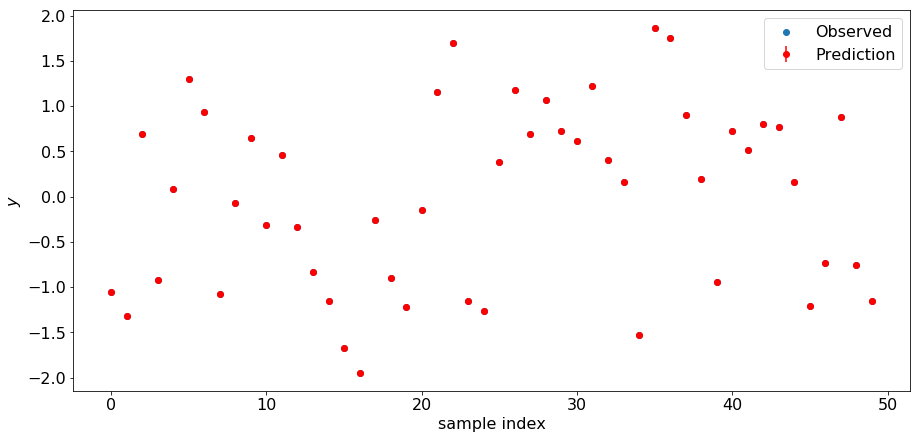

In [9]:
# 訓練データの一致度合いを見る。

plt.figure(figsize=(15, 7))
xs = range(train_pred_mean.shape[0])

plt.scatter(xs, Y, marker="o", label="Observed")

plt.xlabel("sample index")
plt.ylabel("$y$")
# plt.ylim(-3, 3)
plt.errorbar(xs, train_pred_mean, train_pred_std, fmt="ro", label="Prediction", marker="o")
plt.legend(loc="best")
plt.show()